Group members (name, family name, student number):
- HOOMAN SABZI 2119061
- DAIZE LI 2106187
- MARGARITA SHNAIDER 2107523
- FRANCO AQUISTAPACE TAGUA 2106651

# Import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, AveragePooling1D

import pandas as pd
from scipy import stats

import seaborn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Get and prepare the data

## Downloading the data

In [ ]:
# Nonlinear function script as defined in the original exercise folder

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-30 and x[1]>-30 and x[0]+x[1] < 33:
            r=1
        if x[0]+x[1] > 50:
            r=1
    if c==2:
        if (np.sign(0.7*x[0]+0.3*x[1]+10))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

In [ ]:
# append the id to this REST command
file_download_link_x = "https://docs.google.com/uc?export=download&id=" + '1-6tKCRWc_3PHPbRMwx3i3xpr0zjT1Uvh'
!wget "$file_download_link_x" -O x_ts_L80_N4000.dat

--2024-03-09 21:26:35--  https://docs.google.com/uc?export=download&id=1-6tKCRWc_3PHPbRMwx3i3xpr0zjT1Uvh
Resolving docs.google.com (docs.google.com)... 172.217.194.138, 172.217.194.139, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-6tKCRWc_3PHPbRMwx3i3xpr0zjT1Uvh&export=download [following]
--2024-03-09 21:26:35--  https://drive.usercontent.google.com/download?id=1-6tKCRWc_3PHPbRMwx3i3xpr0zjT1Uvh&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.10.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1876014 (1.8M) [application/octet-stream]
Saving to: ‘x_ts_L80_N4000.dat’

x_ts_L80_N4000.dat  100%[===================>]   1.79M  --.-K

In [ ]:
# append the id to this REST command
file_download_link_y = "https://docs.google.com/uc?export=download&id=" + '1SNOO0C-hd15K7_WxVZsgz3eRJ7kAFuJc'
!wget "$file_download_link_y" -O y_ts_L80_N4000.dat

--2024-03-09 21:26:38--  https://docs.google.com/uc?export=download&id=1SNOO0C-hd15K7_WxVZsgz3eRJ7kAFuJc
Resolving docs.google.com (docs.google.com)... 172.217.194.138, 172.217.194.139, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SNOO0C-hd15K7_WxVZsgz3eRJ7kAFuJc&export=download [following]
--2024-03-09 21:26:38--  https://drive.usercontent.google.com/download?id=1SNOO0C-hd15K7_WxVZsgz3eRJ7kAFuJc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.10.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8000 (7.8K) [application/octet-stream]
Saving to: ‘y_ts_L80_N4000.dat’

y_ts_L80_N4000.dat  100%[===================>]   7.81K  --.-KB/s

In [ ]:
x_ts = np.loadtxt('/content/x_ts_L80_N4000.dat', delimiter=" ", dtype=float)
y_ts = np.loadtxt('/content/y_ts_L80_N4000.dat', delimiter=" ", dtype=int)

In [ ]:
# Visualize the data shapes
x_ts.shape, y_ts.shape

((4000, 80), (4000,))

## Additional scripts

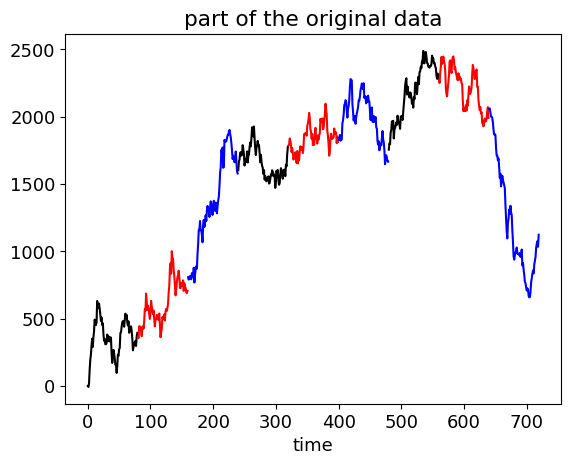

data:  4000


In [ ]:
def Show_data(x,L,s="data",T=3):
    c=("k","r","b")
    for i in range(T):
        j=i*3*L
        plt.plot(np.arange(j,j+L),x[i*3],c=c[0])
        plt.plot(np.arange(j+L,j+2*L),x[i*3+1],c=c[1])
        plt.plot(np.arange(j+2*L,j+3*L),x[i*3+2],c=c[2])
    plt.title(s)
    plt.xlabel("time")
    plt.show()

str0="ts_L80_N4000.dat"
fnamex='x_'+str0
fnamey='y_'+str0

x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
N,L = len(x), len(x[0])

Show_data(x,L,"part of the original data")

categ = np.loadtxt(fnamey, dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

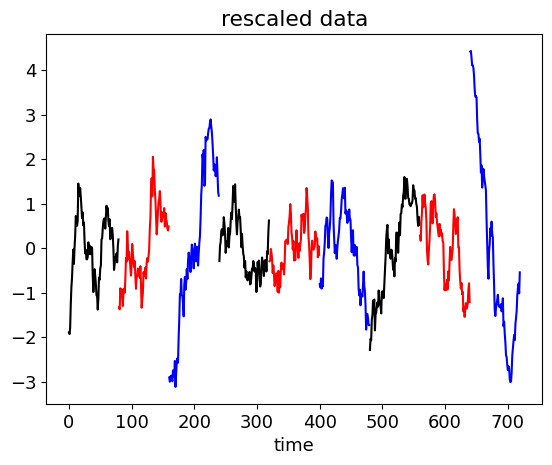

N_train= 3200   N_val= 800   L= 80   n_class= 3


In [ ]:
#
#  FIRST PASSAGE:  DO NOT DO THIS --> FAILURE
#
# bring each sample to zero average
xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]

#
#  SECOND PASSAGE:  DO NOT DO THIS --> ALSO FAILURE
#
#rescale (crude version, variance should be used)
x = x / x.std()

Show_data(x,L,"rescaled data")

perc_train=0.8
N_train = int(perc_train*N)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)

# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val =  x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

In [ ]:
def Show_weights(model,l=0,label="model"):
    c=['r','y','c','b','m','k',"gray","cyan","g"]
    m=['o','s','D','<','>','^','+','x','d',"*"]
    ms=10

    w = model.layers[l].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[l].get_weights()[1]

    fig,AX=plt.subplots(1,2,figsize=(12,4.4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i%len(c)],marker=m[i%len(m)],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i%len(c)],marker=m[i%len(m)],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.show()

#Show_weights(model,0)
#Show_weights(model,2)

In [ ]:
# ...LESSON ...
# Hyper-parameters
# with small minibatch it does not converge!!
BATCH_SIZE = 200
EPOCHS = 300

#print('----- Model ',NCONV,'-----\nFITTING....')
#fit = model.fit(x_train,y_train,batch_size=BATCH_SIZE,
#                epochs=EPOCHS,
#                validation_data=(x_val, y_val),
#                verbose=0, shuffle=True)
#print("end of fit")

In [ ]:
def Show_history(fit):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()
#Show_history(fit)
#Show_weights(model,0)
#Show_weights(model,2)

In [ ]:
LABELS = ["Class 0","Class 1","Class 2"]

def show_confusion_matrix(validations, predictions, label="Model",perc=False):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 5))
    M = matrix
    f = 'd'
    cmap="GnBu"
    if perc:
        M=M/np.sum(M)
        f='.2%'
        cmap='Blues'
    seaborn.heatmap(M,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt=f,
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title(label+': Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#y_pred_val = np.array(model.predict(x_val))
# Take the class with the highest probability from the val predictions
#max_y_pred_val = np.argmax(y_pred_val, axis=1)
#max_y_val = np.argmax(y_val, axis=1)

#show_confusion_matrix(max_y_val, max_y_pred_val)
#show_confusion_matrix(max_y_val, max_y_pred_val,perc=True)

## Some initial visualization and exploration

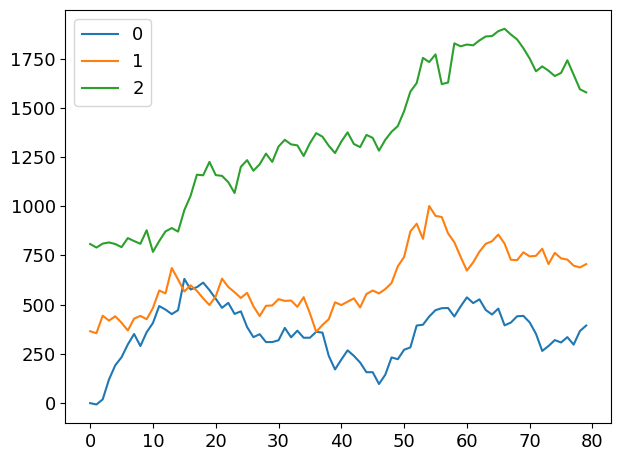

In [ ]:
# Let's plot one example of each class
first_examples = dict()
for i in range(3):
  first_examples[i] = x_ts[np.where(y_ts == i)[0][0], :]

for c in first_examples:
  plt.plot(first_examples[c], label=c)
plt.legend()
plt.tight_layout();

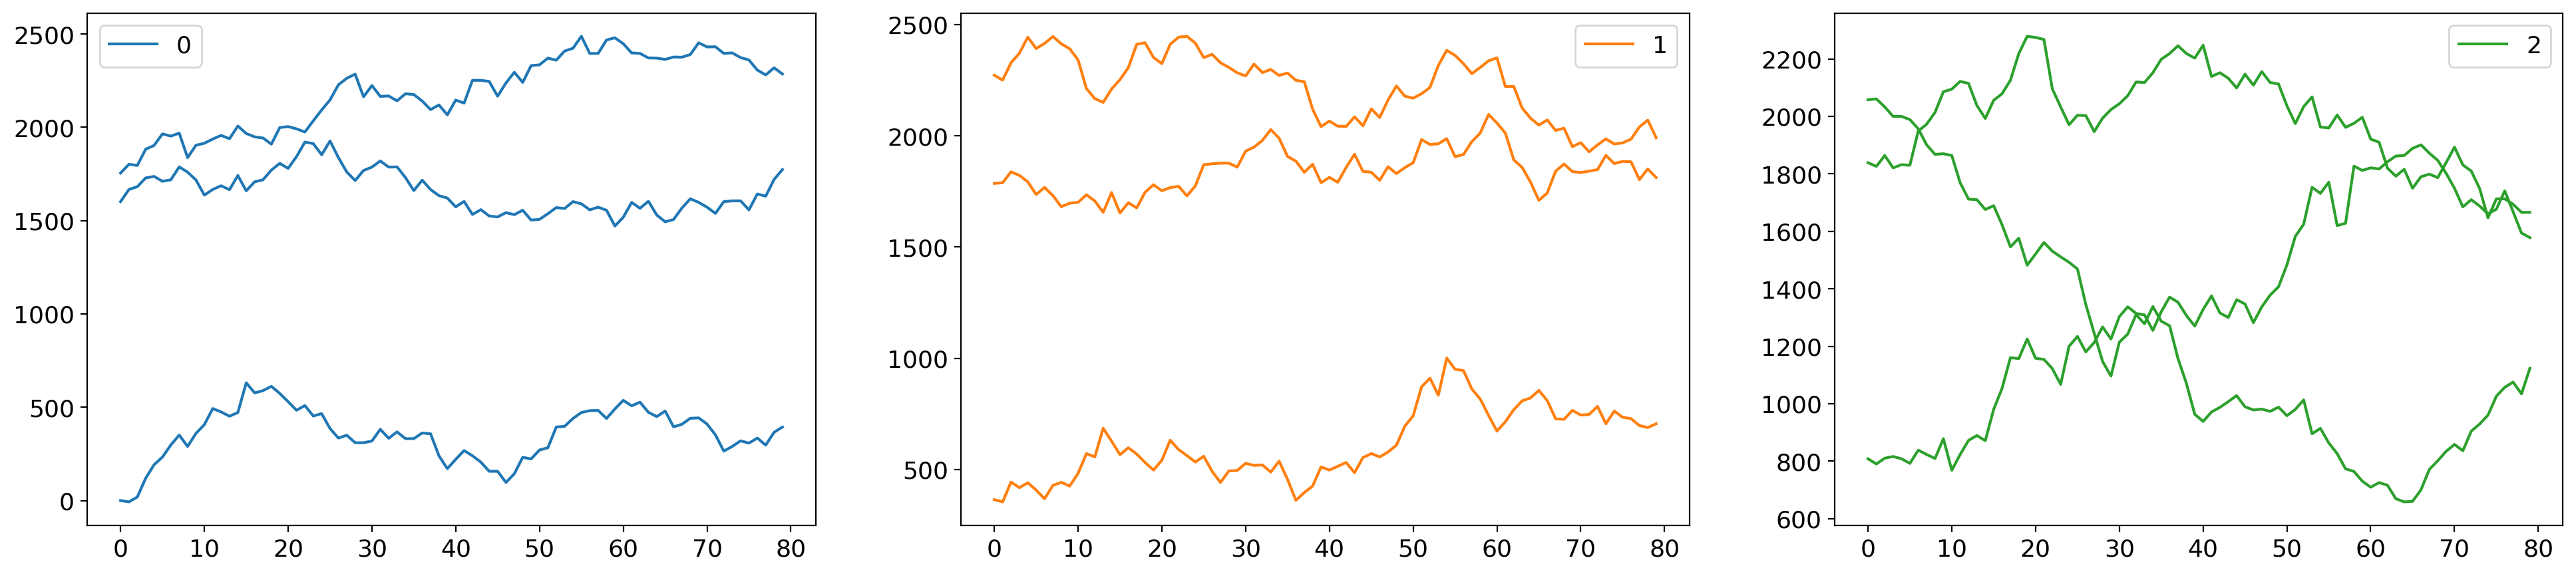

In [ ]:
# Plot some series of the same classes, to get some intuition
fig, axs = plt.subplots(figsize=(3*8, 5), dpi=200, nrows=1, ncols=3)
n_series = 3
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(3):
  for j in range(n_series):
    axs[i].plot(x_ts[np.where(y_ts == i)[0][j], :],
                label=i if j == 0 else None, c=colors[i])
  axs[i].legend()

# Exercises

## 1. Choose one of the two G and D versions of the CNN for the remaining exercise, motivating your choice

In the following, we implement the CNN version with Global Max Pooling, as the presence of a pooling layer adds robust translation invariance to the model after the input has gone through the convolutional layers.



## 2. Optimizer exploration

### (Do not run this section again)

In [ ]:
NCONV=2

def build_model(NCONV, NF=5,KS=6, NF2=5,KS2=4, lamb=0, opt=tf.keras.optimizers.Adam()):
    """
    filter = kernel
    NCONV=index of the CNN architecture
    NF=nr of filters in the 1st layer
    KS=kernel size in the 1st layer
    NF2=nr of filters in the 2nd layer
    KS2=kernel size in the 2nd layer
    lamb=not the animal, but lambda, the regularization parameter
    """
    # regularizers, l2=Ridge, l1=LASSO
    reg = keras.regularizers.l2(lamb)
    model = Sequential()

    # Version with last layer Dense
    if NCONV==1:
        model.add(Conv1D(filters=5,
                         kernel_size=KS,
                         kernel_regularizer=reg,
                         activation='relu',
                         input_shape=input_shape))
        model.add(MaxPooling1D(3))
        #model.add(AveragePooling1D(3))
        model.add(Conv1D(filters=NF2, kernel_size=KS2,activation='relu'))
        model.add(Flatten())
        model.add(Dense(12, activation='relu'))
        model.add(Dropout(0.2))

    # Version with last layer GlobalMaxPooling, one more intermediate conv1D, and no intermediate pooling
    if NCONV==2:
        model.add(Conv1D(filters=NF2,
                         kernel_size=KS2,
                         kernel_regularizer=reg,
                         activation='relu',
                         input_shape=input_shape))
        model.add(Conv1D(filters=NF2, kernel_size=KS2,activation='relu'))
        model.add(Conv1D(filters=NF2, kernel_size=KS2,activation='relu'))
        model.add(tf.keras.layers.GlobalMaxPooling1D())
        model.add(Flatten())

    # Last layer, with n_class units
    model.add(Dense(n_class, activation='softmax')) # softmax !

    # compile the model
    # categorical_crossentropy, 3 output nodes
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])

    return model

# Aux function to return an optimizer
def get_optimizer(opt_class, lr):
    # optimizers
    # .SGD(lr=0.01, momentum=0.9, nesterov=True) # decay=1e-6,
    # .RMSprop()
    # .Adam()
    # .Adagrad()
    # Define the optimizer learning rate as a hyperparameter.
    if opt_class == 'adam':
        return tf.keras.optimizers.Adam(lr)
    elif opt_class == 'rmsprop':
        return tf.keras.optimizers.legacy.RMSprop(lr)
    elif opt_class == 'nesterov':
        return tf.keras.optimizers.SGD(lr, momentum=0.9, nesterov=True)
    elif opt_class == 'adagrad':
        return tf.keras.optimizers.Adagrad(lr)

In [ ]:
lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opts = ["adam", "rmsprop", "nesterov", "adagrad"]

seeds = [100 + i for i in range(5)]

results = dict()
N_epochs = 100
for opt_class in opts:
    for lr in lrs:
        for seed in seeds:
            # Set random seed
            tf.random.set_seed(seed)
            # Build model with custom optimizer
            model=build_model(NCONV=NCONV,
                              opt=get_optimizer(opt_class, lr))
            # Fit the model
            history = model.fit(x_train, y_train, batch_size=200, epochs=N_epochs,
                               validation_data=(x_val, y_val), verbose=0, steps_per_epoch=2)
            # Store results
            key = opt_class + "_" + str(lr) + "_" + str(seed)
            results[key] = history

In [ ]:
# Plot one example
plt.plot(results['rmsprop_0.001_100'].history['accuracy'])

Given the computational resoruces available we opted for 100 epochs on each training run, but reducing the amount of samples considered using the ```steps_per_epoch``` parameter.

In [ ]:
# Now let's process these results before the notebook crashes
import pandas as pd

In [ ]:
# We want the mean and std of each optimizer with a specific lr,
# over the runs with different seeds

data_dict = {'optimizer': [], 'learning_rate': [],
            'loss_mean': [], 'loss_std': [],
            'acc_mean': [], 'acc_std': [],
            'val_loss_mean': [], 'val_loss_std': [],
            'val_acc_mean': [], 'val_acc_std': []}

# Iterate over our dict
for opt_class in opts:
    for lr in lrs:
        key = opt_class + "_" + str(lr) + "_"
        # Get data
        opt_runs = [results[key+str(seed)].history for seed in seeds]
        # Save results
        data_dict['optimizer'].append(opt_class)
        data_dict['learning_rate'].append(lr)

        # We are not using callbacks, so we'll use the final training epoch
        # for our analysis
        # Training stats
        data_dict['loss_mean'].append(np.mean([res['loss'][-1] for res in opt_runs]))
        data_dict['loss_std'].append(np.std([res['loss'][-1] for res in opt_runs]))
        data_dict['acc_mean'].append(np.mean([res['accuracy'][-1] for res in opt_runs]))
        data_dict['acc_std'].append(np.std([res['accuracy'][-1] for res in opt_runs]))

        # Validation stats
        data_dict['val_loss_mean'].append(np.mean([res['val_loss'][-1] for res in opt_runs]))
        data_dict['val_loss_std'].append(np.std([res['val_loss'][-1] for res in opt_runs]))
        data_dict['val_acc_mean'].append(np.mean([res['val_accuracy'][-1] for res in opt_runs]))
        data_dict['val_acc_std'].append(np.std([res['val_accuracy'][-1] for res in opt_runs]))

In [ ]:
data_df = pd.DataFrame(data_dict)
data_df

,optimizer,learning_rate,loss_mean,loss_std,acc_mean,acc_std,val_loss_mean,val_loss_std,val_acc_mean,val_acc_std
0,adam,0.000001,1.153242,0.057610,0.3375,0.014142,1.146967,0.051035,0.33050,0.003221
1,adam,0.000010,1.171624,0.042092,0.3175,0.012845,1.158610,0.034435,0.32725,0.013024
2,adam,0.000100,1.116385,0.032626,0.3510,0.017790,1.121046,0.029083,0.34300,0.014440
3,adam,0.001000,1.045346,0.027428,0.4785,0.046033,1.040856,0.030842,0.47025,0.048460
4,adam,0.010000,0.815239,0.088539,0.6285,0.067279,0.805057,0.058816,0.63975,0.043613
5,rmsprop,0.000001,1.167789,0.059067,0.3170,0.013638,1.162638,0.056588,0.33425,0.001000
6,rmsprop,0.000010,1.159730,0.076532,0.3480,0.019066,1.164003,0.081659,0.32700,0.007770
7,rmsprop,0.000100,1.106937,0.022606,0.3335,0.025130,1.103695,0.015603,0.33925,0.035774
8,rmsprop,0.001000,1.031513,0.023181,0.4890,0.022282,1.031580,0.023577,0.49150,0.020788
9,rmsprop,0.010000,0.858110,0.056742,0.5985,0.036111,0.848519,0.062713,0.60900,0.051389


In [ ]:
data_df.to_csv('/content/optimizer_comparison_results_2.csv')
data_df

,optimizer,learning_rate,loss_mean,loss_std,acc_mean,acc_std,val_loss_mean,val_loss_std,val_acc_mean,val_acc_std
0,adam,0.000001,1.153242,0.057610,0.3375,0.014142,1.146967,0.051035,0.33050,0.003221
1,adam,0.000010,1.171624,0.042092,0.3175,0.012845,1.158610,0.034435,0.32725,0.013024
2,adam,0.000100,1.116385,0.032626,0.3510,0.017790,1.121046,0.029083,0.34300,0.014440
3,adam,0.001000,1.045346,0.027428,0.4785,0.046033,1.040856,0.030842,0.47025,0.048460
4,adam,0.010000,0.815239,0.088539,0.6285,0.067279,0.805057,0.058816,0.63975,0.043613
5,rmsprop,0.000001,1.167789,0.059067,0.3170,0.013638,1.162638,0.056588,0.33425,0.001000
6,rmsprop,0.000010,1.159730,0.076532,0.3480,0.019066,1.164003,0.081659,0.32700,0.007770
7,rmsprop,0.000100,1.106937,0.022606,0.3335,0.025130,1.103695,0.015603,0.33925,0.035774
8,rmsprop,0.001000,1.031513,0.023181,0.4890,0.022282,1.031580,0.023577,0.49150,0.020788
9,rmsprop,0.010000,0.858110,0.056742,0.5985,0.036111,0.848519,0.062713,0.60900,0.051389


In [ ]:
# Let's now save this data to a file, so as to not train the models
# every time this notebook resets
data_df.to_csv('optimizer_comparison_results.csv')

### Load previously obtained results

In [ ]:
# append the id to this REST command
file_download_link_csv = "https://docs.google.com/uc?export=download&id=" + '13WqAGIKgy055ic1yWXxdy_OKvz9lfEzY'
!wget "$file_download_link_csv" -O optimizer_comparison_results.csv

--2024-03-09 21:26:43--  https://docs.google.com/uc?export=download&id=13WqAGIKgy055ic1yWXxdy_OKvz9lfEzY
Resolving docs.google.com (docs.google.com)... 172.217.194.138, 172.217.194.139, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=13WqAGIKgy055ic1yWXxdy_OKvz9lfEzY&export=download [following]
--2024-03-09 21:26:44--  https://drive.usercontent.google.com/download?id=13WqAGIKgy055ic1yWXxdy_OKvz9lfEzY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.10.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3588 (3.5K) [application/octet-stream]
Saving to: ‘optimizer_comparison_results.csv’

optimizer_compariso 100%[===================>]   3

In [ ]:
import pandas as pd

In [ ]:
# Read the csv file
data_df = pd.read_csv('/content/optimizer_comparison_results.csv')
data_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data_df

,optimizer,learning_rate,loss_mean,loss_std,acc_mean,acc_std,val_loss_mean,val_loss_std,val_acc_mean,val_acc_std
0,adam,0.000001,1.153242,0.057610,0.3375,0.014142,1.146967,0.051035,0.33050,0.003221
1,adam,0.000010,1.171624,0.042092,0.3175,0.012845,1.158610,0.034435,0.32725,0.013024
2,adam,0.000100,1.116385,0.032626,0.3510,0.017790,1.121046,0.029083,0.34300,0.014440
3,adam,0.001000,1.045346,0.027428,0.4785,0.046033,1.040856,0.030842,0.47025,0.048460
4,adam,0.010000,0.815239,0.088539,0.6285,0.067279,0.805057,0.058816,0.63975,0.043613
5,rmsprop,0.000001,1.167789,0.059067,0.3170,0.013638,1.162638,0.056588,0.33425,0.001000
6,rmsprop,0.000010,1.159730,0.076532,0.3480,0.019066,1.164003,0.081659,0.32700,0.007770
7,rmsprop,0.000100,1.106937,0.022606,0.3335,0.025130,1.103695,0.015603,0.33925,0.035774
8,rmsprop,0.001000,1.031513,0.023181,0.4890,0.022282,1.031580,0.023577,0.49150,0.020788
9,rmsprop,0.010000,0.858110,0.056742,0.5985,0.036111,0.848519,0.062713,0.60900,0.051389


In [ ]:
max_acc = data_df['val_acc_mean'].max()
max_acc

0.6397500038146973

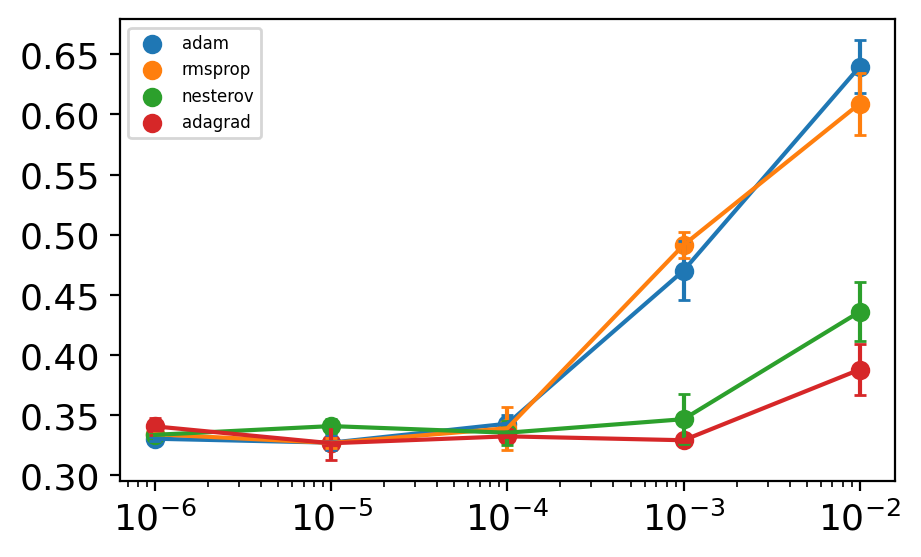

In [ ]:
# Plot results
opt_classes = data_df.optimizer.unique()
fig, ax = plt.subplots(figsize=(5,3), dpi=200, nrows=1, ncols=1)
for opt_class in opt_classes:
  data = data_df.loc[data_df.optimizer == opt_class]
  ax.scatter(data['learning_rate'], data['val_acc_mean'], label=opt_class)
  ax.errorbar(data['learning_rate'], data['val_acc_mean'],
              yerr=data['val_acc_std']/2, capsize=2)
plt.rc('font', size=6)
plt.xscale('log')
ax.legend();

# 3. Interpretation of the models

## (Do not run this section again)

In [ ]:
opt='adam'
lr=1e-2

model1 = Sequential()
model1=build_model(NCONV=2, opt=get_optimizer(opt, lr))
model1.fit(x_train, y_train, batch_size=200, epochs=EPOCHS,
                                validation_data=(x_val, y_val), verbose=0, steps_per_epoch=2)


In [ ]:
number_filters = kernel_sizes = [3, 4, 6, 9, 11]
lambdas = [1e-5, 1e-3, 1e-2, 1e-1, 0]

BATCH_SIZE2 = 200
EPOCHS2 = 100

results = dict()

#def build_model(NCONV=1, NF=5,KS=6, NF2=5,KS2=4, lamb=0):

data_dict = {'Lambda': [], 'Kernel Size': [], 'Number of Filters': [],
            'loss_mean': [], 'acc_mean': [],
            'val_loss_mean': [], 'val_acc_mean': []}

for lamb in lambdas:
  for ks in kernel_sizes:
    for nf in number_filters:

      model2 = build_model(NCONV=2, NF2=nf,KS2=ks, lamb=lamb)

      opt2 = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
      model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=opt2,metrics=['accuracy'])

      fit2 = model2.fit(x_train,y_train,batch_size=BATCH_SIZE2,epochs=EPOCHS2,
                                            validation_data=(x_val, y_val), verbose=0, shuffle=True, steps_per_epoch=2)

      key = str(lamb) + "_" + str(ks) + "_" + str(nf)
      res = fit2.history
      results[key] = model2

      data_dict['Lambda'].append(lamb)
      data_dict['Kernel Size'].append(ks)
      data_dict['Number of Filters'].append(nf)

      # We are not using callbacks, so we'll use the final training epoch
      # for our analysis
      # Training stats
      data_dict['loss_mean'].append(res['loss'][-1])
      data_dict['acc_mean'].append(res['accuracy'][-1])

      # Validation stats
      data_dict['val_loss_mean'].append(res['val_loss'][-1])
      data_dict['val_acc_mean'].append(res['val_accuracy'][-1])

In [ ]:
import pandas as pd
data_df2 = pd.DataFrame(data_dict)
data_df2

In [ ]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [ ]:
for key in results:
  results[key].save('/content/models/' + key + '.keras')

In [ ]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/lamb_0_1/ (stored 0%)
  adding: content/models/lamb_0_1/0.1_11_3.keras (deflated 88%)
  adding: content/models/lamb_0_1/0.1_3_6.keras (deflated 88%)
  adding: content/models/lamb_0_1/0.1_6_4.keras (deflated 88%)
  adding: content/models/lamb_0_1/0.1_4_9.keras (deflated 83%)
  adding: content/models/lamb_0_1/0.1_9_3.keras (deflated 89%)
  adding: content/models/lamb_0_1/0.1_9_11.keras (deflated 69%)
  adding: content/models/lamb_0_1/0.1_4_4.keras (deflated 89%)
  adding: content/models/lamb_0_1/0.1_11_11.keras (deflated 66%)
  adding: content/models/lamb_0_1/0.1_3_3.keras (deflated 91%)
  adding: content/models/lamb_0_1/0.1_9_9.keras (deflated 75%)
  adding: content/models/lamb_0_1/0.1_6_9.keras (deflated 79%)
  adding: content/models/lamb_0_1/0.1_6_6.keras (deflated 85%)
  adding: content/models/lamb_0_1/0.1_4_3.keras (deflated 90%)
  adding: content/models/lamb_0_1/0.1_4_11.keras (deflated 79%)
  adding: content/models/lam

In [ ]:
from google.colab import files
files.download('/content/models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analysis and visualization of results

In [ ]:
# append the id to this REST command
file_download_link_models = "https://docs.google.com/uc?export=download&id=" + '1cPQe0zRNYzULb9KQg_AH14af_v7AVtkj'
!wget "$file_download_link_models" -O models_zip

--2024-03-09 21:27:05--  https://docs.google.com/uc?export=download&id=1cPQe0zRNYzULb9KQg_AH14af_v7AVtkj
Resolving docs.google.com (docs.google.com)... 172.217.194.102, 172.217.194.101, 172.217.194.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1cPQe0zRNYzULb9KQg_AH14af_v7AVtkj&export=download [following]
--2024-03-09 21:27:05--  https://drive.usercontent.google.com/download?id=1cPQe0zRNYzULb9KQg_AH14af_v7AVtkj&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.10.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 720278 (703K) [application/octet-stream]
Saving to: ‘models_zip’

models_zip          100%[===================>] 703.40K  --.-KB/s    in

In [ ]:
# Unzip models folder
!unzip -q /content/models_zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Aux function
def Show_weights_for_lambdas(model_name, l=0):
    lamb_vals = [0, 1e-5, 0.001, 0.01, 0.1]
    lamb_dirs = ['lamb_' + s + '/' for s in ['0', '1e-05', '0_001', '0_01', '0_1']]
    c=['r','y','c','b','m','k',"gray","cyan","g"]
    m=['o','s','D','<','>','^','+','x','d',"*"]
    ms=10

    fig,AX=plt.subplots(len(lamb_vals), 1 ,figsize=(8, 5*len(lamb_vals)))
    for k, ax in enumerate(AX):
        # Get model
        key = lamb_dirs[k] + str(lamb_vals[k]) + '_' + model_name + '.keras'
        model = load_model('/content/models/' + key)
        # Get weights of layer
        w = model.layers[l].get_weights()[0]
        wT=w.T
        M=len(wT)
        # Plot results
        ax.axhline(0, c="k")
        ax.plot((0,))
        for i in range(M):
            ax.plot(wT[i][0],"-",c=c[i%len(c)],marker=m[i%len(m)],label=str(i),markersize=ms)
        ax.set_title(r'$\lambda=%s$' % lamb_vals[k])
        ax.set_xlabel('index')
    plt.show();

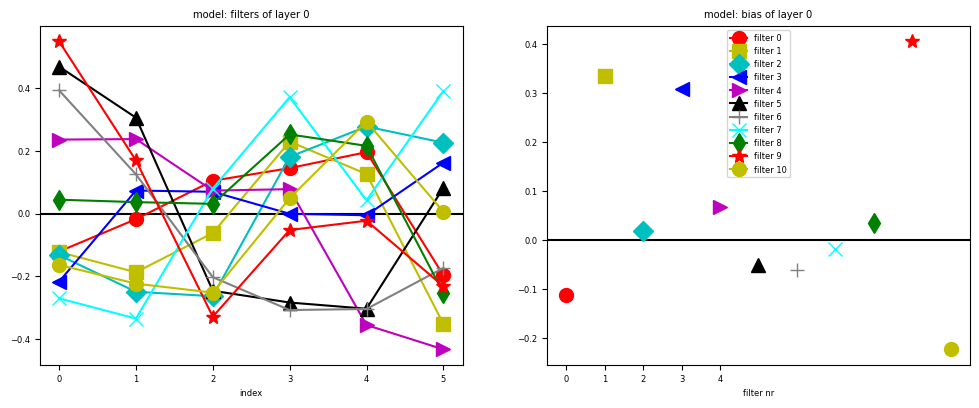

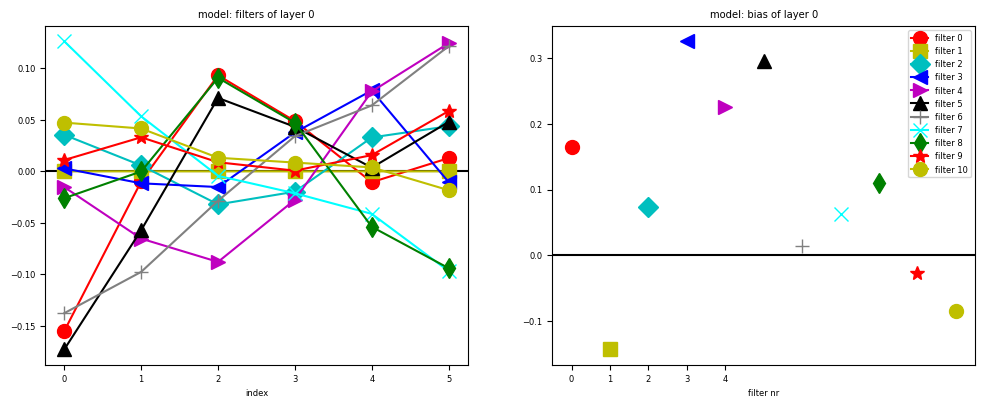

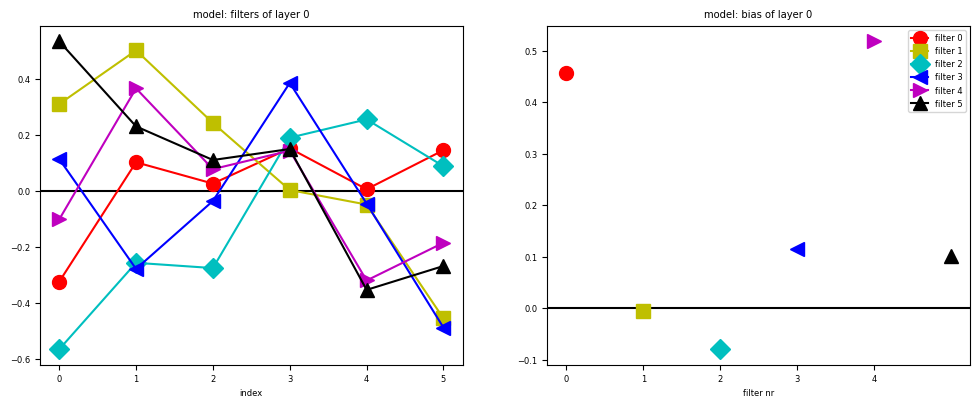

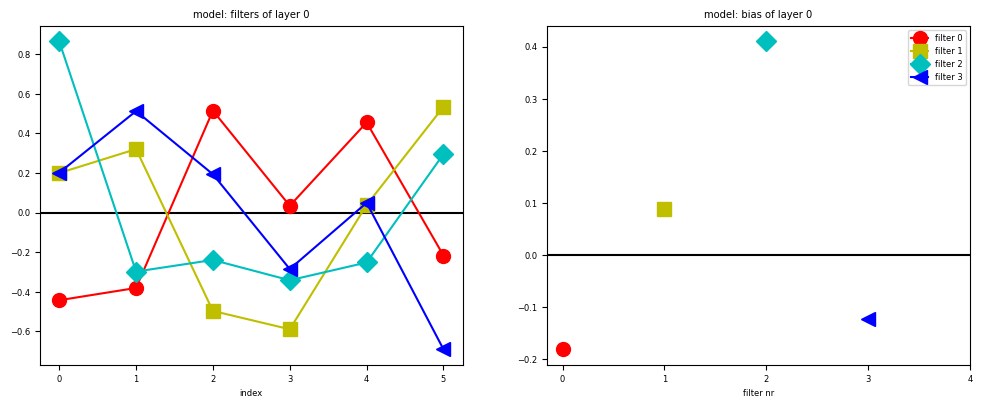

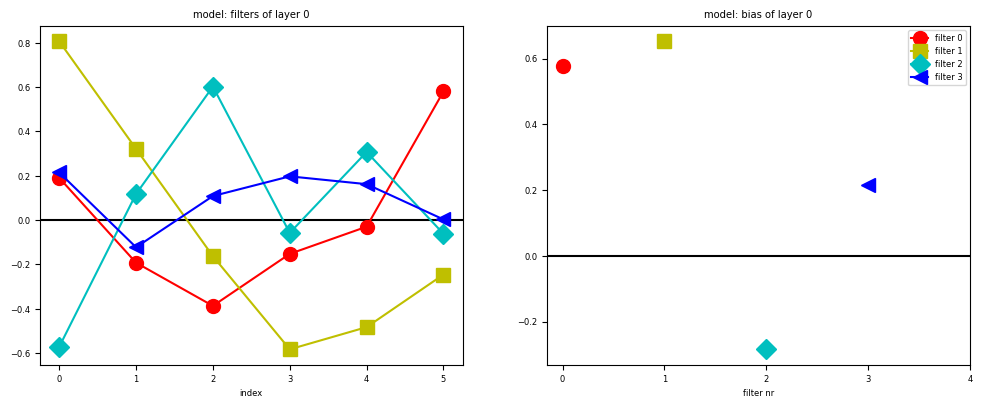

In [ ]:
from keras.models import load_model

model = load_model('/content/models/lamb_0_001/0.001_6_11.keras')
Show_weights(model,0)
model1 = load_model('/content/models/lamb_0_1/0.1_6_11.keras')
Show_weights(model1,0)
model2 = load_model('/content/models/lamb_0_001/0.001_6_6.keras')
Show_weights(model2,0)
model3 = load_model('/content/models/lamb_0/0_6_4.keras')
Show_weights(model3,0)
model4 = load_model('/content/models/lamb_1e-05/1e-05_6_4.keras')
Show_weights(model4,0)

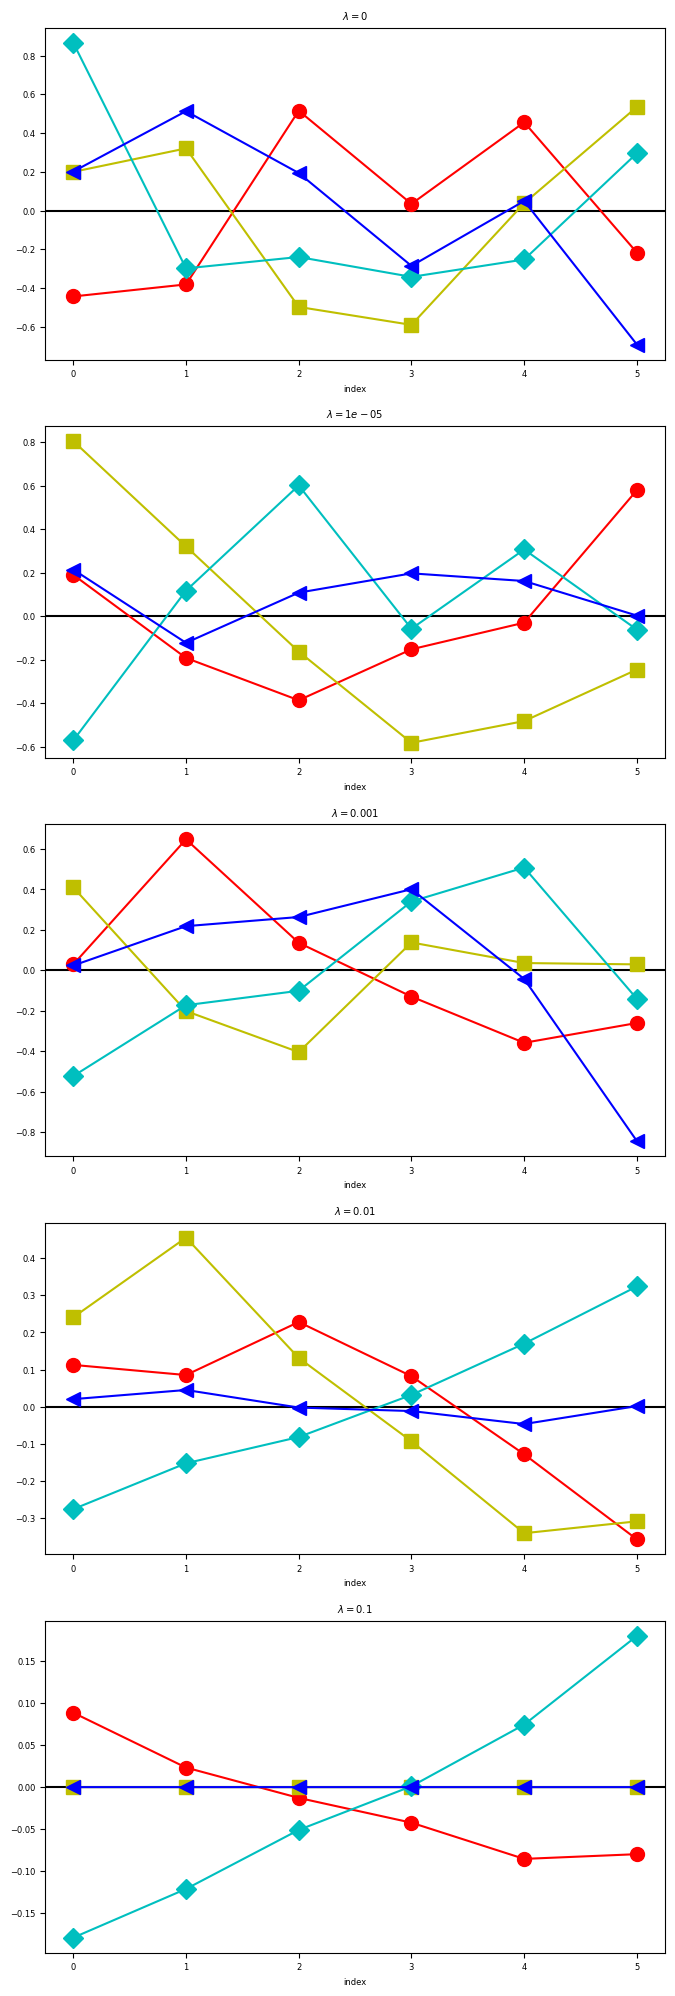

In [ ]:
# Let's display a single model with its various lambdas
# Model: kernel size = 6, number of filters = 4
Show_weights_for_lambdas(model_name='6_4')

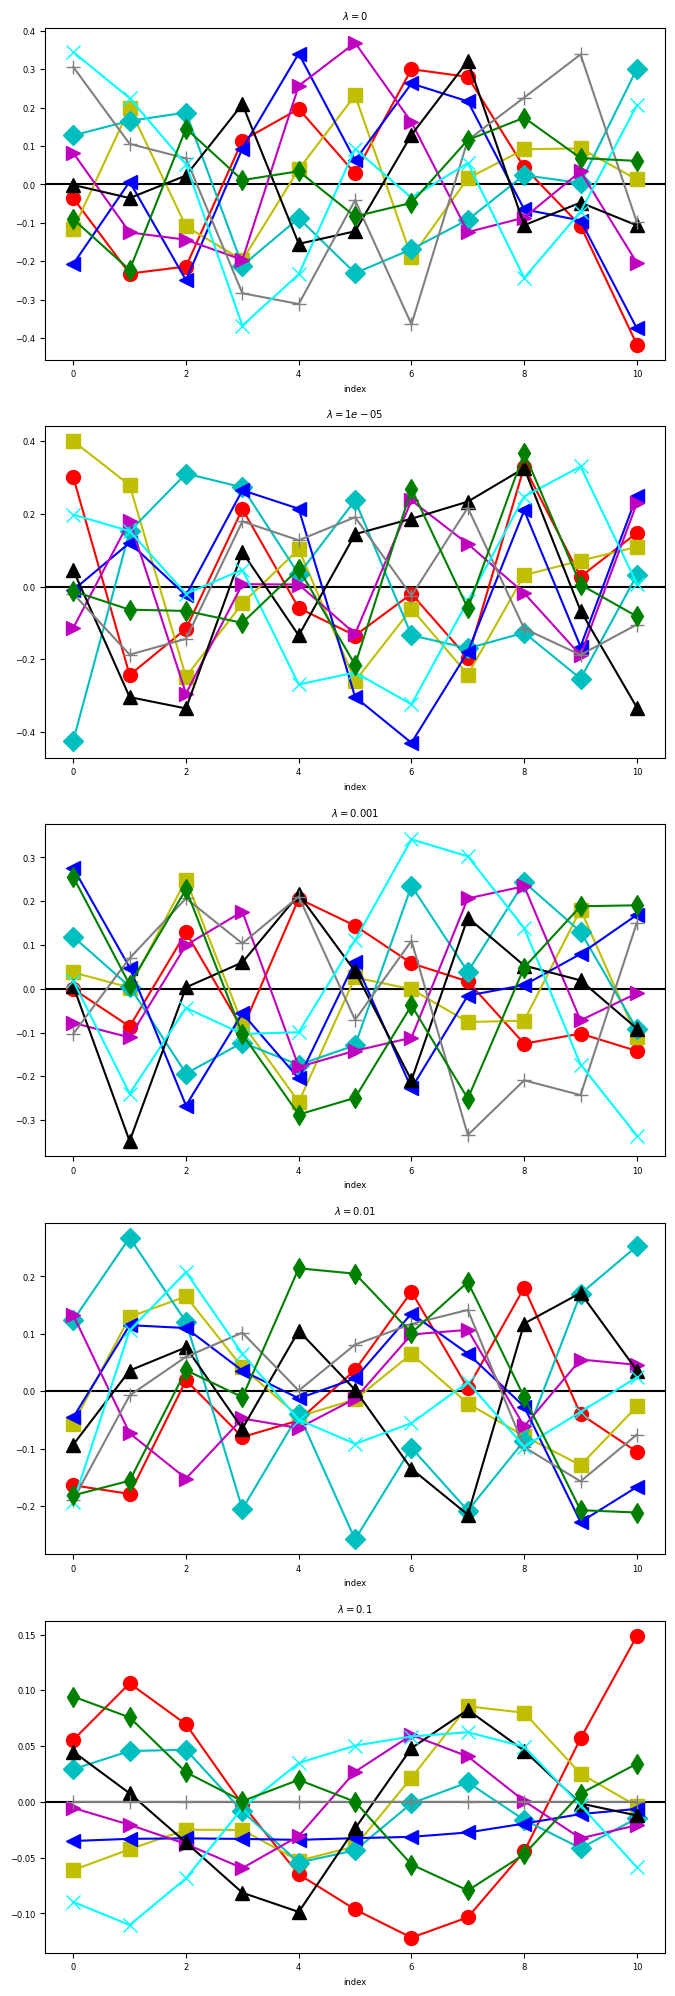

In [ ]:
# Let's display a single model with its various lambdas
# Model: kernel size = 11, number of filters = 9
Show_weights_for_lambdas(model_name='11_9')

We have analysed four kinds of optimizers (adam, rmsprop, nesterov, adagrad) with different learning rates (1e-2, 1e-3, 1e-4, 1e-5 ,1e-6). With the downward trend in the train loss_mean and val_loss_mean, we think the highest val_acc_mean is credible (optimizer-adam, learning_rate-1e-2).

We choose adam as the best optimizer from step two. Based on this optimizer, we introduce regularization and find it makes a good influence of accuracy.

By varying the $\lambda$ parameter of regularization ($\lambda$ = 0, 1e-5, 1e-3, 1e-2, 1e-1). We analysed two different models (no.1: kernel size = 6, number of filters = 4  no.2: kernel size = 11, number of filters = 9). With an increase of $\lambda$, a large effect on the weights of the filters is observed. The larger values for $\lambda$ decrease the weights of some filters, effectively ''turning them off'', and thus it is useful for avoiding overfitting in our models. However, we can observe that half of the weights of the filter closely approach zero, which may increase the risk of underftting.

Additionally it can be observed that, as $\lambda$ increases, the patterns described by the filters become more understandable and less noisy. This is important when considering how interpretable the model is.

# 4. Random hyperparameter search

In [ ]:
# Install keras_tuner (run only once)
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner

In [ ]:
def build_model_tuned(hp):
    """
    filter = kernel
    NCONV=index of the CNN architecture
    NF=nr of filters in the 1st layer
    KS=kernel size in the 1st layer
    NF2=nr of filters in the 2nd layer
    KS2=kernel size in the 2nd layer
    lamb=not the animal, but lambda, the regularization parameter
    """
    # regularizers, l2=Ridge, l1=LASSO
    reg = keras.regularizers.l2(0)
    model = Sequential()

    # Version with last layer GlobalMaxPooling, one more intermediate conv1D, and no intermediate pooling
    NF = hp.Int('filters', min_value=6, max_value=11, step=1)
    KS = hp.Int('kernel_size', min_value=6, max_value=11, step=1)
    activation = hp.Choice("activation", ["relu", "tanh", 'selu'])
    model.add(Conv1D(filters=NF,
                      kernel_size=KS,
                      kernel_regularizer=reg,
                      activation=activation,
                      input_shape=input_shape))
    model.add(Conv1D(filters=NF, kernel_size=KS,activation=activation))
    model.add(Conv1D(filters=NF, kernel_size=KS,activation=activation))
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(Flatten())

    # Last layer, with n_class units
    model.add(Dense(n_class, activation='softmax')) # softmax !

    # compile the model
    # categorical_crossentropy, 3 output nodes
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                  metrics=['accuracy'])

    return model

In [ ]:
# Let's implement the random search
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model_tuned,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="random_search",
)

# Print summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
filters (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 11, 'step': 1, 'sampling': 'linear'}
kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 11, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'selu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}


In [ ]:
# Let's perform the search
tuner.search(x_train, y_train, epochs=100, validation_data=(x_val, y_val),
             steps_per_epoch=2, verbose=0)

In [ ]:
# Finally show the results
tuner.results_summary()

Results summary
Results in my_dir/random_search
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
filters: 6
kernel_size: 10
activation: relu
dropout: False
Score: 0.7399999797344208

Trial 0 summary
Hyperparameters:
filters: 11
kernel_size: 10
activation: selu
dropout: False
Score: 0.7337499856948853

Trial 1 summary
Hyperparameters:
filters: 10
kernel_size: 9
activation: selu
dropout: True
Score: 0.731249988079071


The ReLU activation performed the best. Nevertheless the SeLU activation, which was not previously considered, also performed reasonably well. The best kernel size according to this search seems to be around 9-10, while the best number of filters appears to be 6.